In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [13]:
df.shape

(5572, 5)

In [14]:
# Steps:
#1. Data Cleaning
#2. EDA
#3. Text preprocessing
#4. Model building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deployment

## 1. Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
#dropping the 3 columns with much missing values
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [17]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
df.sample(5)

,v1,v2
2966,ham,NEFT Transaction with reference number &lt;#&...
3465,ham,"Actually fuck that, just do whatever, do find ..."
1888,ham,No. On the way home. So if not for the long dr...
4173,ham,And pls pls drink plenty plenty water
394,ham,Pick you up bout 7.30ish? What time are and t...


In [19]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [20]:
df.sample(5)

,target,text
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...
881,ham,"see, i knew giving you a break a few times wou..."
2837,ham,Were trying to find a Chinese food place aroun...
2615,ham,2marrow only. Wed at &lt;#&gt; to 2 aha.
466,ham,They don't put that stuff on the roads to keep...


In [21]:
#encoding the target variable using labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
#checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
#checking for duplicate values
df.duplicated().sum()

403

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
df.shape

(5169, 2)

## 2. EDA

In [28]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

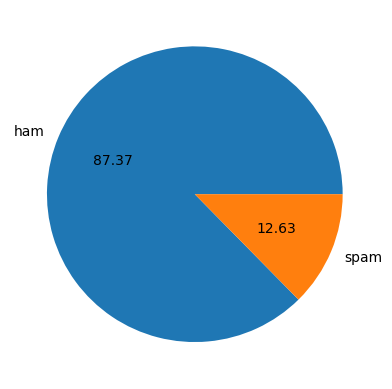

In [29]:
# using pie chart to visualize the data points
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

The above chart shows that the data is imbalanced

## 3. Text Preprocessing

Using Spacy for Text Processing

In [30]:
import spacy

nlp = spacy.load('en_core_web_lg')

In [31]:
#extracting the length of the sentene
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [32]:
#extracting the number of words using spacy
def num_word_tokens(text):
    doc = nlp(text)
    words = []
    for token in doc:
        words.append(token)
    return len(words)

df['num_words'] = df['text'].apply(num_word_tokens)

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
#extracting the number of sentence from the text
def num_sent_tokens(text):
    doc = nlp(text)
    sents = []
    for token in doc.sents:
        sents.append(token)
    return len(sents)

df['num_sentence'] = df['text'].apply(num_sent_tokens)
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
#checking the descriptive statistics of the newly created features
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.339911,2.142000
std,58.236293,13.175170,1.462758
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,26.000000,3.000000
max,910.000000,196.000000,20.000000


In [36]:
# descriptive statistics for ham messages

df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.919176,1.995350
std,56.358207,13.224373,1.402805
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,20.000000


In [37]:
# descriptive statistics for spam messages

df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,28.165391,3.156202
std,30.137753,7.361204,1.467473
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,224.000000,49.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

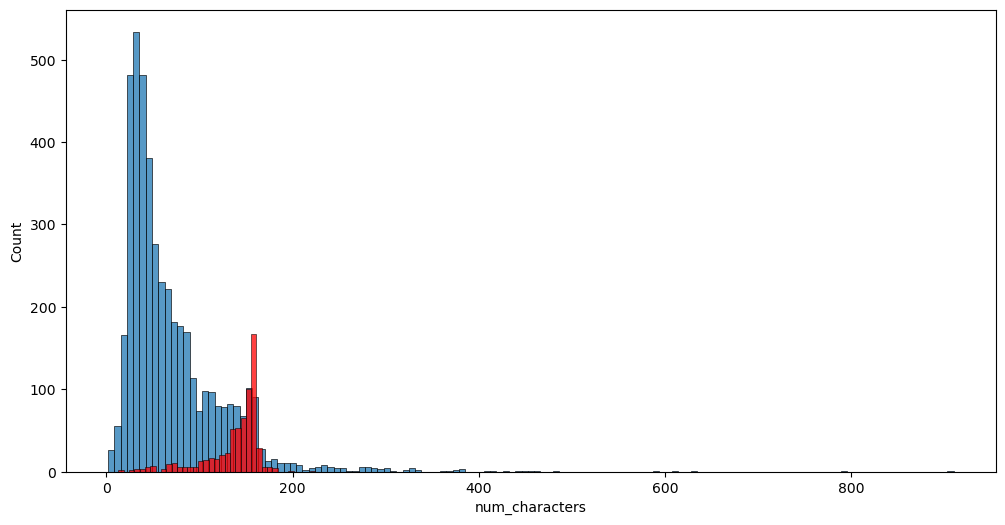

In [38]:
#visualizing
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

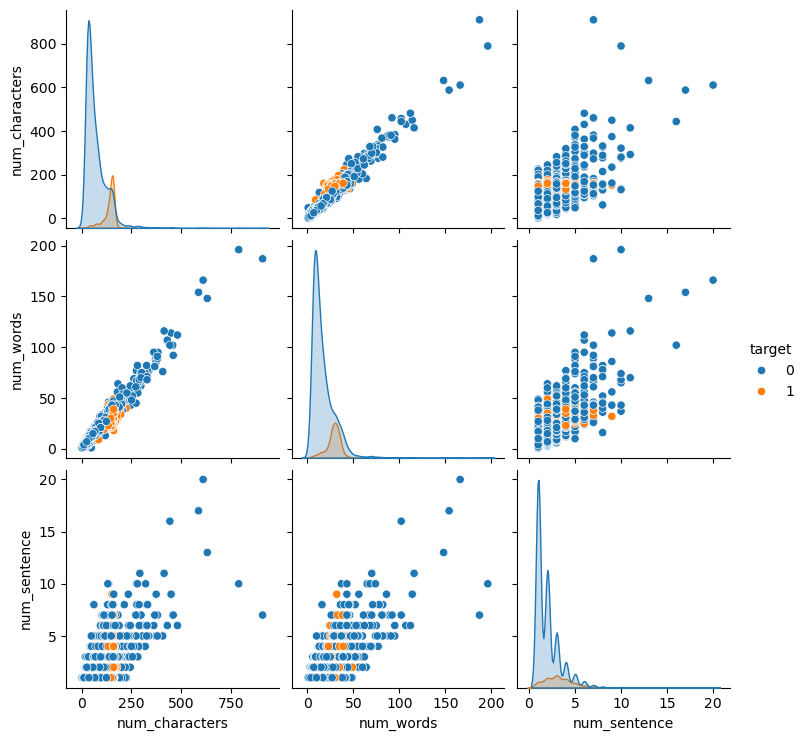

In [39]:
#correlation analysis using pairplot
sns.pairplot(df,hue='target')

**Inference:** We can see that the num_characters, num_words, num_sentence are related to each other

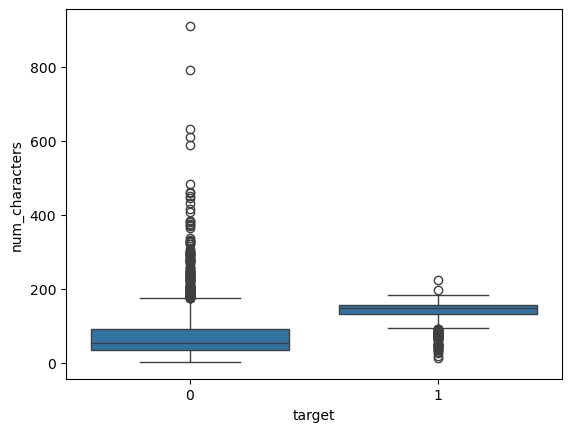

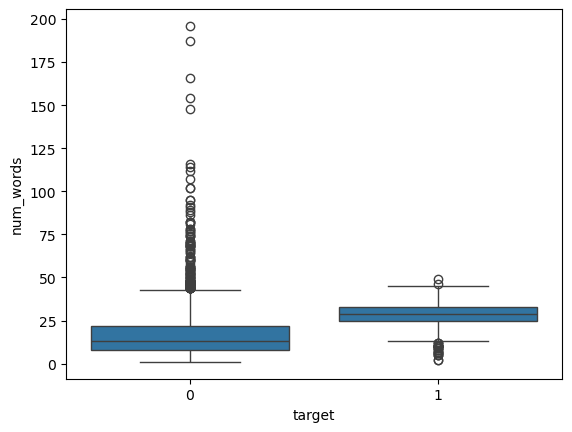

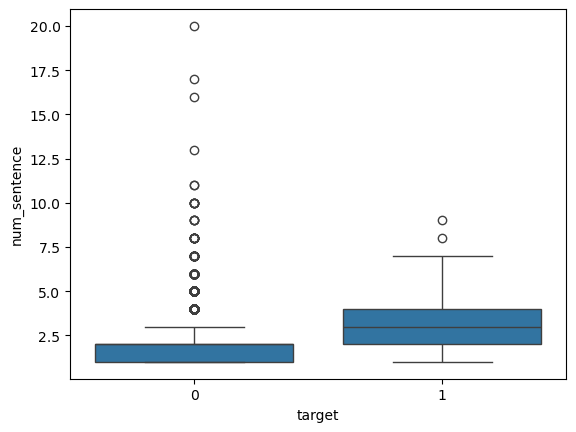

In [40]:
#using boxplot to understand
num = ['num_characters',	'num_words',	'num_sentence']
for i in num:
    sns.boxplot(data=df, x='target', y=i)
    plt.show()


**Inference:** From the above we can see that most of the messages that has high number of characters, high number of words and high number of sentence are mostly not spam.

We can say from this that the number of characters, words and sentence has a relationship to the classification of the message if its spam or not

In [41]:
df.sort_values(by='num_characters', ascending=False)

,target,text,num_characters,num_words,num_sentence
1084,0,For me the love should start with attraction.i...,910,187,7
1862,0,The last thing i ever wanted to do was hurt yo...,790,196,10
2433,0,Indians r poor but India is not a poor country...,632,148,13
1578,0,How to Make a girl Happy? It's not at all diff...,611,166,20
2157,0,Sad story of a Man - Last week was my b'day. M...,588,154,17
...,...,...,...,...,...
260,0,Yup,3,1,1
3374,0,:),3,1,1
5268,0,\ER,3,1,1
1611,0,645,3,1,1


<Axes: >

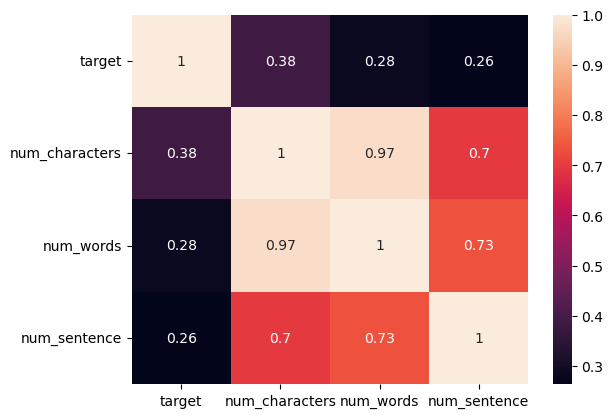

In [42]:
#correlation with heatmap
sns.heatmap(df[['target','num_characters','num_words','num_sentence']].corr(),annot=True)

## 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [43]:
def preprocess(text):
    doc = nlp(text)
    remaining_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct or not token.text.isalnum(): #check whether a given token is stop word or punctuations, or special characters
            continue
        remaining_tokens.append(token.text.lower())
    return " ".join(remaining_tokens)


In [44]:
preprocess('I loved the YT lecture on machine Learning How about you 500?')

'loved yt lecture machine learning 500'

In [45]:
#Applying the process function on the dataset
df['preprocess_text'] = df['text'].apply(preprocess)
df.head()

,target,text,num_characters,num_words,num_sentence,preprocess_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives


### Visualizing with Wordcloud

In [46]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
#using wordcloud to visualize the text
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='pink')

In [48]:
#wordcloud of spam label
wc_spam = wc.generate(df[df['target']==1]['preprocess_text'].str.cat(sep=" "))


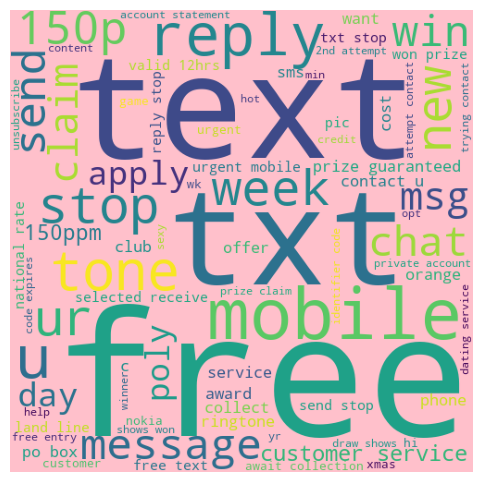

In [49]:
# Display word cloud
plt.figure(figsize=(15,6))
plt.imshow(wc_spam)
plt.axis("off")
plt.show()

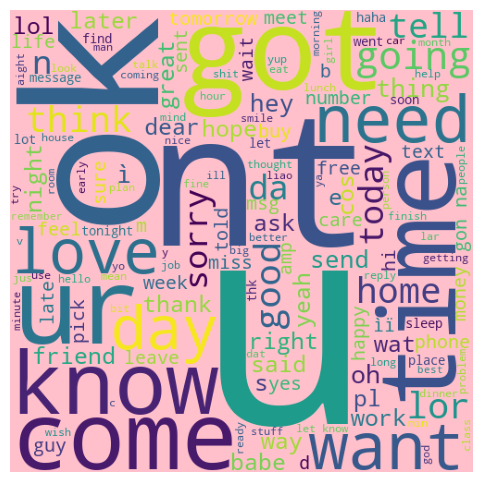

In [50]:
#wordcloud for the ham text
wc_ham = wc.generate(df[df['target']==0]['preprocess_text'].str.cat(sep=" "))

#plotting the wordcloud
plt.figure(figsize=(15,6))
plt.imshow(wc_ham)
plt.axis("off")
plt.show()

In [51]:
#filtering the transformed text from the dataframe, trying to understand the word count for the spam
spam_corpus = []
for msg in df[df['target']==1]['preprocess_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

len(spam_corpus)

9598

In [52]:
from collections import Counter

sc = Counter(spam_corpus)
sc.most_common(30)

[('free', 194),
 ('2', 156),
 ('txt', 129),
 ('ur', 119),
 ('u', 113),
 ('mobile', 109),
 ('text', 106),
 ('stop', 104),
 ('4', 99),
 ('claim', 96),
 ('reply', 93),
 ('prize', 82),
 ('cash', 65),
 ('new', 64),
 ('won', 59),
 ('send', 58),
 ('150p', 57),
 ('urgent', 57),
 ('nokia', 55),
 ('contact', 51),
 ('win', 49),
 ('service', 49),
 ('week', 46),
 ('tone', 44),
 ('msg', 43),
 ('phone', 43),
 ('guaranteed', 42),
 ('customer', 40),
 ('18', 39),
 ('min', 38)]

In [53]:
#converting to dataframe
sc_df = pd.DataFrame(sc.most_common(30))
sc_df

,0,1
0,free,194
1,2,156
2,txt,129
3,ur,119
4,u,113
5,mobile,109
6,text,106
7,stop,104
8,4,99
9,claim,96


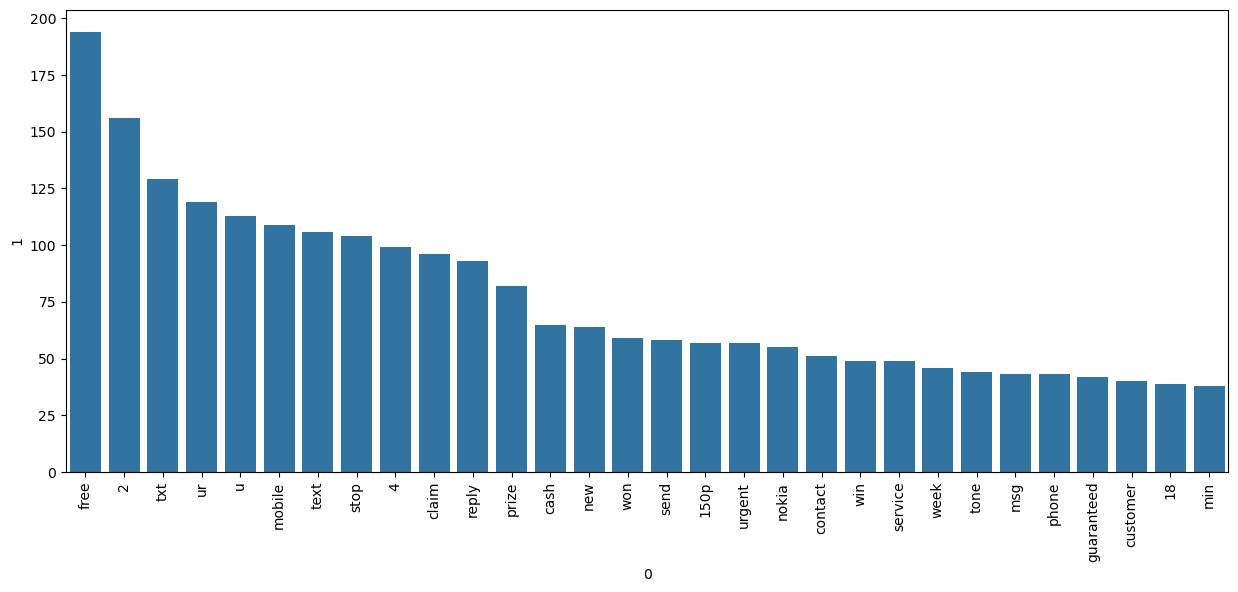

In [54]:
#plotting a barchat
plt.figure(figsize=(15,6))
sns.barplot(x=sc_df[0],y=sc_df[1])
plt.xticks(rotation=90)
plt.show()

In [55]:
#filtering the transformed text from the dataframe, trying to understand the word count for the ham
ham_corpus = []
for msg in df[df['target']==0]['preprocess_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)

30886

In [56]:
from collections import Counter

hc = Counter(ham_corpus)
hc.most_common(30)

[('u', 863),
 ('2', 292),
 ('nt', 280),
 ('ok', 249),
 ('got', 235),
 ('know', 224),
 ('like', 220),
 ('come', 210),
 ('good', 209),
 ('ur', 196),
 ('time', 183),
 ('day', 172),
 ('love', 169),
 ('going', 163),
 ('4', 163),
 ('want', 160),
 ('lor', 159),
 ('need', 152),
 ('home', 151),
 ('da', 129),
 ('think', 126),
 ('today', 124),
 ('n', 122),
 ('sorry', 122),
 ('ì', 120),
 ('r', 120),
 ('tell', 117),
 ('send', 110),
 ('hi', 108),
 ('oh', 105)]

In [57]:
#converting to dataframe
hc_df = pd.DataFrame(hc.most_common(30))
hc_df

,0,1
0,u,863
1,2,292
2,nt,280
3,ok,249
4,got,235
5,know,224
6,like,220
7,come,210
8,good,209
9,ur,196


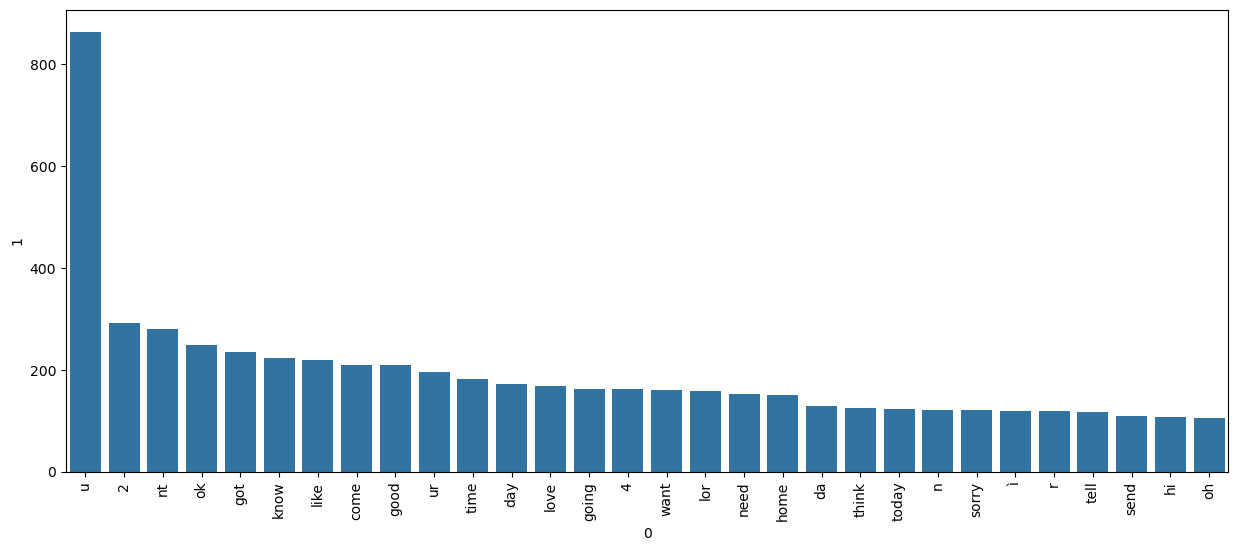

In [58]:
#plotting a barchat
plt.figure(figsize=(15,6))
sns.barplot(x=hc_df[0],y=hc_df[1])
plt.xticks(rotation=90)
plt.show()

## 4. Model Building

### using word vector from en_core_web_lg

In [59]:
df['vector'] = df['preprocess_text'].apply(lambda text: nlp(text).vector)

In [60]:
df.head()

,target,text,num_characters,num_words,num_sentence,preprocess_text,vector
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,jurong point crazy available bugis n great wor...,"[1.1959584, 0.89595264, 0.5339543, -0.9311554,..."
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[-0.33230335, 1.0907167, 0.21502167, -0.99249,..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,2,free entry 2 wkly comp win fa cup final tkts 2...,"[-0.33603603, -2.387281, 1.4245965, 1.1912315,..."
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun early hor u c,"[-2.6560285, 2.6946735, 1.7887977, -1.7868301,..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives,"[1.2416599, 1.79006, -2.459418, -1.528574, 1.0..."


In [61]:
#splitting

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df['vector']
y = df['target']

In [64]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int32

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
#reshaping the X variable
X_train_reshape = np.stack(X_train, axis=0)
X_test_reshape = np.stack(X_test, axis=0)

In [67]:
X_train_reshape

array([[-0.86956596,  2.00006   , -4.04432   , ...,  1.60266   ,
        -1.903734  ,  1.8389523 ],
       [-1.96565   , -1.110325  , -1.7961875 , ...,  0.636564  ,
        -0.4063    ,  1.238775  ],
       [ 1.8522329 ,  3.836243  , -6.7846146 , ...,  2.6633713 ,
        -4.146886  ,  1.4473016 ],
       ...,
       [ 1.1115469 ,  0.6454284 , -2.5148833 , ...,  2.5300992 ,
        -3.729659  ,  0.7919354 ],
       [ 0.13935836, -1.8200842 , -1.4427184 , ...,  0.2882099 ,
        -2.0770316 ,  0.70968634],
       [-0.6777467 ,  0.40836167, -2.02447   , ...,  0.28524366,
         0.779025  , -1.0572182 ]], dtype=float32)

In [68]:
#scaling the X lable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_reshape)
X_test_scaled = scaler.transform(X_test_reshape)

### Performing Smote to solve imbalance Problem

In [69]:
from imblearn.over_sampling import SMOTE

In [70]:
# Create a SMOTE object
smote = SMOTE(random_state=42)

# Fit the SMOTE object to the training data and transform it
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [71]:
X_train_smote.shape, y_train_smote.shape

((7226, 300), (7226,))

In [72]:
#models to train with
#Knn, GaussianNB, MultinomialNB, BernoulliNB, randomforest, AdaBoostClassifier, GradientBoostingClassifier

In [73]:
#importing necessary models to use
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
#importing the evaluation metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [74]:
mn = MultinomialNB()
bn = BernoulliNB()
gn = GaussianNB()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
sv = SVC()
kn = KNeighborsClassifier()
xg = XGBClassifier()
cb = CatBoostClassifier()

In [75]:
y_test[:50]

5318    0
5281    0
2459    0
1305    0
5083    0
677     0
4472    0
5513    0
4950    0
4780    0
1177    0
2901    0
2232    0
3834    0
1641    0
3415    0
4349    0
81      0
2397    0
4214    0
4225    0
3628    0
3849    0
4136    0
5194    0
4853    0
4940    0
4416    0
819     0
1299    0
1555    0
1164    0
5452    0
4240    0
1666    0
2090    0
1772    0
2027    0
3538    0
2511    0
1600    0
3082    0
1383    0
2576    0
4808    0
5051    0
48      0
3574    0
2471    0
4603    0
Name: target, dtype: int32

In [ ]:
#MultinomialNB
mn.fit(X_train_smote, y_train_smote)
y_pred_mn = mn.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_mn)}")
print(f"precision score is {precision_score(y_test, y_pred_mn)}")
print(f"recall score is {recall_score(y_test, y_pred_mn)}")
print(f"f1 score is {f1_score(y_test, y_pred_mn)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_mn)}")
print(f"classification report is {classification_report(y_test, y_pred_mn)}")

In [ ]:
#BernoulliNB
bn.fit(X_train_smote, y_train_smote)
y_pred_bn = bn.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_bn)}")
print(f"precision score is {precision_score(y_test, y_pred_bn)}")
print(f"recall score is {recall_score(y_test, y_pred_bn)}")
print(f"f1 score is {f1_score(y_test, y_pred_bn)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_bn)}")
print(f"classification report is {classification_report(y_test, y_pred_bn)}")

In [ ]:
#GaussianNB
gn.fit(X_train_smote, y_train_smote)
y_pred_gn = gn.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_gn)}")
print(f"precision score is {precision_score(y_test, y_pred_gn)}")
print(f"recall score is {recall_score(y_test, y_pred_gn)}")
print(f"f1 score is {f1_score(y_test, y_pred_gn)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_gn)}")
print(f"classification report is {classification_report(y_test, y_pred_gn)}")

In [ ]:
#RandomForestClassifier
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_rf)}")
print(f"precision score is {precision_score(y_test, y_pred_rf)}")
print(f"recall score is {recall_score(y_test, y_pred_rf)}")
print(f"f1 score is {f1_score(y_test, y_pred_rf)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_rf)}")
print(f"classification report is {classification_report(y_test, y_pred_rf)}")

In [ ]:
#AdaBoostClassifier
ad.fit(X_train_smote, y_train_smote)
y_pred_ad = ad.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_ad)}")
print(f"precision score is {precision_score(y_test, y_pred_ad)}")
print(f"recall score is {recall_score(y_test, y_pred_ad)}")
print(f"f1 score is {f1_score(y_test, y_pred_ad)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_ad)}")
print(f"classification report is {classification_report(y_test, y_pred_ad)}")

In [ ]:
#GradientBoostingClassifier
gb.fit(X_train_smote, y_train_smote)
y_pred_gb = gb.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_gb)}")
print(f"precision score is {precision_score(y_test, y_pred_gb)}")
print(f"recall score is {recall_score(y_test, y_pred_gb)}")
print(f"f1 score is {f1_score(y_test, y_pred_gb)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_gb)}")
print(f"classification report is {classification_report(y_test, y_pred_gb)}")

In [ ]:
#DecisionTreeClassifier
dt.fit(X_train_smote, y_train_smote)
y_pred_dt = dt.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_dt)}")
print(f"precision score is {precision_score(y_test, y_pred_dt)}")
print(f"recall score is {recall_score(y_test, y_pred_dt)}")
print(f"f1 score is {f1_score(y_test, y_pred_dt)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_dt)}")
print(f"classification report is {classification_report(y_test, y_pred_dt)}")

In [ ]:
#SVC
sv.fit(X_train_smote, y_train_smote)
y_pred_sv = sv.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_sv)}")
print(f"precision score is {precision_score(y_test, y_pred_sv)}")
print(f"recall score is {recall_score(y_test, y_pred_sv)}")
print(f"f1 score is {f1_score(y_test, y_pred_sv)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_sv)}")
print(f"classification report is {classification_report(y_test, y_pred_sv)}")

In [ ]:
#KNeighborsClassifier
kn.fit(X_train_smote, y_train_smote)
y_pred_kn = kn.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_kn)}")
print(f"precision score is {precision_score(y_test, y_pred_kn)}")
print(f"recall score is {recall_score(y_test, y_pred_kn)}")
print(f"f1 score is {f1_score(y_test, y_pred_kn)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_kn)}")
print(f"classification report is {classification_report(y_test, y_pred_kn)}")

In [ ]:
#XGBClassifier
xg.fit(X_train_smote, y_train_smote)
y_pred_xg = kn.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_xg)}")
print(f"precision score is {precision_score(y_test, y_pred_xg)}")
print(f"recall score is {recall_score(y_test, y_pred_xg)}")
print(f"f1 score is {f1_score(y_test, y_pred_xg)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_xg)}")
print(f"classification report is {classification_report(y_test, y_pred_xg)}")

In [ ]:
#CatBoostClassifier
cb.fit(X_train_smote, y_train_smote)
y_pred_cb = cb.predict(X_test_scaled)
print(f"accuracy score is {accuracy_score(y_test, y_pred_cb)}")
print(f"precision score is {precision_score(y_test, y_pred_cb)}")
print(f"recall score is {recall_score(y_test, y_pred_cb)}")
print(f"f1 score is {f1_score(y_test, y_pred_cb)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred_cb)}")
print(f"classification report is {classification_report(y_test, y_pred_cb)}")

In [77]:
# using the TFIDfvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [78]:
X_tfid = tf.fit_transform(df['preprocess_text']).toarray()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size=0.2, random_state=42)

In [80]:
y.shape

(5169,)

In [81]:
y_train.shape

(4135,)

In [82]:
y_test.shape

(1034,)

## Note:
The problem statment determines which particular metrice we will use for evaluation.

1. If we want our model to focus only on the spam message and not by any chance predict those that are not spam to be spam, we should focus on *Precision*

2. If we want the model to predict more of spam and leaving non untouch, it might likely pick even the ones that are not spam we can go for *recall*.

3. Else we can consider both *Precision* and *Recall*

In this case we shall be considering both Precision and Recall, no biase

SO we'll also consider F1-score



### We can still experiment more without scaling and oversampling

In [85]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
ada = AdaBoostClassifier()
bc = BernoulliNB()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [86]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'AdaBoost' : ada,
    'Bernoulli' : bc,
    'Multinomial' : mnb,
    'Decision Tree' : dtc,
    'Random Forest' : rfc,
    'XGBoost' : xgb,
    'Logistic Regression' : lrc
}

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 7941), (1034, 7941), (4135,), (1034,))

In [88]:

def classifier(clf, X_train, y_train, X_test, y_test):
    """Trains the classifier and returns performance metrics."""
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, prec, rec, f1

# Iterating through classifiers
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items():
    print(f"\nTraining Classifier: {name}")
    # Get the scores
    acc, prec, rec, f1 = classifier(clf, X_train, y_train, X_test, y_test)
    # Append scores
    accuracy_scores.append(acc)
    precision_scores.append(prec)
    recall_scores.append(rec)
    f1_scores.append(f1)
    # Print results
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")



Training Classifier: SVC
Accuracy Score: 0.9720
Precision Score: 0.9717
Recall Score: 0.9720
F1 Score: 0.9711

Training Classifier: KN
Accuracy Score: 0.8926
Precision Score: 0.9046
Recall Score: 0.8926
F1 Score: 0.8625

Training Classifier: AdaBoost


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.9603
Precision Score: 0.9595
Recall Score: 0.9603
F1 Score: 0.9589

Training Classifier: Bernoulli
Accuracy Score: 0.9671
Precision Score: 0.9673
Recall Score: 0.9671
F1 Score: 0.9656

Training Classifier: Multinomial
Accuracy Score: 0.9613
Precision Score: 0.9630
Recall Score: 0.9613
F1 Score: 0.9586

Training Classifier: Decision Tree
Accuracy Score: 0.9178
Precision Score: 0.9149
Recall Score: 0.9178
F1 Score: 0.9074

Training Classifier: Random Forest
Accuracy Score: 0.9691
Precision Score: 0.9698
Recall Score: 0.9691
F1 Score: 0.9675

Training Classifier: XGBoost
Accuracy Score: 0.9642
Precision Score: 0.9643
Recall Score: 0.9642
F1 Score: 0.9625

Training Classifier: Logistic Regression
Accuracy Score: 0.9410
Precision Score: 0.9397
Recall Score: 0.9410
F1 Score: 0.9366


In [89]:
algorithms = []
for i in clfs.keys():
  algorithms.append(i)

In [90]:
performance_df = pd.DataFrame({'Algorithms':algorithms, 'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Recall':recall_scores, 'F1 Score':f1_scores})

In [91]:
performance_df

,Algorithms,Accuracy,Precision,Recall,F1 Score
0,SVC,0.971954,0.971710,0.971954,0.971119
1,KN,0.892650,0.904566,0.892650,0.862519
2,AdaBoost,0.960348,0.959488,0.960348,0.958894
3,Bernoulli,0.967118,0.967339,0.967118,0.965616
4,Multinomial,0.961315,0.962981,0.961315,0.958646
5,Decision Tree,0.917795,0.914879,0.917795,0.907371
6,Random Forest,0.969052,0.969779,0.969052,0.967524
7,XGBoost,0.964217,0.964258,0.964217,0.962516
8,Logistic Regression,0.941006,0.939657,0.941006,0.936567


In [92]:
#melting the performance dataframe
performance_df1 = performance_df.melt(id_vars='Algorithms', var_name='Metrics', value_name='value')

In [93]:
performance_df1

,Algorithms,Metrics,value
0,SVC,Accuracy,0.971954
1,KN,Accuracy,0.892650
2,AdaBoost,Accuracy,0.960348
3,Bernoulli,Accuracy,0.967118
4,Multinomial,Accuracy,0.961315
5,Decision Tree,Accuracy,0.917795
6,Random Forest,Accuracy,0.969052
7,XGBoost,Accuracy,0.964217
8,Logistic Regression,Accuracy,0.941006
9,SVC,Precision,0.971710


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'SVC'),
  Text(1, 0, 'KN'),
  Text(2, 0, 'AdaBoost'),
  Text(3, 0, 'Bernoulli'),
  Text(4, 0, 'Multinomial'),
  Text(5, 0, 'Decision Tree'),
  Text(6, 0, 'Random Forest'),
  Text(7, 0, 'XGBoost'),
  Text(8, 0, 'Logistic Regression')])

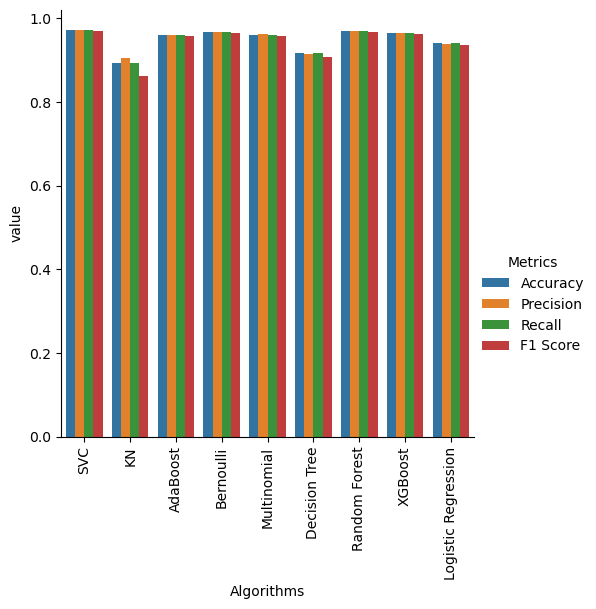

In [94]:
#plotting the dataframe
sns.catplot(x='Algorithms', y='value', hue='Metrics', data=performance_df1, kind='bar')
plt.xticks(rotation=90)

#### improving the model performance
1. Changing the max_features of TfidfVectorizer to 3000
2. Scale the X variable
3. appending any of the other columns to the vectorized column
      appending the num_character column to X
      X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
4. applying voting classifier: i.e combining two or more best performing classifier

5. Applying stacking



In [95]:
#Changing the max_features of TfidfVectorizer to 3000
tf2 = TfidfVectorizer(max_features=3000)

In [96]:
X_tf2 = tf2.fit_transform(df['preprocess_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_tf2, y, test_size=0.2, random_state=42)

In [97]:
# Iterating through classifiers
accuracy_scores2 = []
precision_scores2 = []
recall_scores2 = []
f1_scores = []

for name, clf in clfs.items():
    print(f"\nTraining Classifier: {name}")

    # Get the scores
    acc, prec, rec, f1 = classifier(clf, X_train, y_train, X_test, y_test)

    # Append scores
    accuracy_scores2.append(acc)
    precision_scores2.append(prec)
    recall_scores2.append(rec)
    f1_scores.append(f1)

    # Print results
    print(f"Accuracy Score: {acc:.4f}")
    print(f"Precision Score: {prec:.4f}")
    print(f"Recall Score: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")


Training Classifier: SVC
Accuracy Score: 0.9749
Precision Score: 0.9746
Recall Score: 0.9749
F1 Score: 0.9742

Training Classifier: KN
Accuracy Score: 0.9033
Precision Score: 0.9131
Recall Score: 0.9033
F1 Score: 0.8804

Training Classifier: AdaBoost


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy Score: 0.9603
Precision Score: 0.9593
Recall Score: 0.9603
F1 Score: 0.9594

Training Classifier: Bernoulli
Accuracy Score: 0.9758
Precision Score: 0.9760
Recall Score: 0.9758
F1 Score: 0.9750

Training Classifier: Multinomial
Accuracy Score: 0.9729
Precision Score: 0.9737
Recall Score: 0.9729
F1 Score: 0.9717

Training Classifier: Decision Tree
Accuracy Score: 0.9188
Precision Score: 0.9159
Recall Score: 0.9188
F1 Score: 0.9087

Training Classifier: Random Forest
Accuracy Score: 0.9729
Precision Score: 0.9735
Recall Score: 0.9729
F1 Score: 0.9718

Training Classifier: XGBoost
Accuracy Score: 0.9671
Precision Score: 0.9669
Recall Score: 0.9671
F1 Score: 0.9659

Training Classifier: Logistic Regression
Accuracy Score: 0.9526
Precision Score: 0.9520
Recall Score: 0.9526
F1 Score: 0.9498


In [98]:
performance_tf2 = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy':accuracy_scores2, 'Precision':precision_scores2, 'Recall':recall_scores2, 'F1-score':f1_scores})

In [100]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
print(classification_report(y_test, ypred))
confusion_matrix(y_test, ypred)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.96      0.86      0.91       145

    accuracy                           0.97      1034
   macro avg       0.97      0.92      0.95      1034
weighted avg       0.97      0.97      0.97      1034



array([[884,   5],
       [ 21, 124]], dtype=int64)

In [101]:
merged_df = pd.merge(performance_df, performance_tf2, on='Algorithms')

In [102]:
merged_df.sort_values(by='F1-score', ascending=False)

,Algorithms,Accuracy_x,Precision_x,Recall_x,F1 Score,Accuracy_y,Precision_y,Recall_y,F1-score
3,Bernoulli,0.967118,0.967339,0.967118,0.965616,0.975822,0.976008,0.975822,0.975019
0,SVC,0.971954,0.971710,0.971954,0.971119,0.974855,0.974614,0.974855,0.974233
6,Random Forest,0.969052,0.969779,0.969052,0.967524,0.972921,0.973451,0.972921,0.971782
4,Multinomial,0.961315,0.962981,0.961315,0.958646,0.972921,0.973748,0.972921,0.971684
7,XGBoost,0.964217,0.964258,0.964217,0.962516,0.967118,0.966896,0.967118,0.965854
2,AdaBoost,0.960348,0.959488,0.960348,0.958894,0.960348,0.959347,0.960348,0.959433
8,Logistic Regression,0.941006,0.939657,0.941006,0.936567,0.952611,0.951996,0.952611,0.949816
5,Decision Tree,0.917795,0.914879,0.917795,0.907371,0.918762,0.915927,0.918762,0.908671
1,KN,0.892650,0.904566,0.892650,0.862519,0.903288,0.913067,0.903288,0.880413


In [103]:
#applying voting classifier

from sklearn.ensemble import VotingClassifier

In [104]:
voting1 = VotingClassifier(estimators=[('bnb', bc), ('mnb', mnb), ('svc', svc), ('rfc', rfc)], voting='hard')

In [105]:
voting1.fit(X_train, y_train)
y_pred = voting1.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")
print(f"f1 score is {f1_score(y_test, y_pred)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred)}")

accuracy score is 0.9748549323017408
precision score is 1.0
recall score is 0.8206896551724138
f1 score is 0.9015151515151515
confusion matrix is [[889   0]
 [ 26 119]]


In [106]:
voting2 = VotingClassifier(estimators=[('bnb', bc), ('mnb', mnb), ('rfc', rfc), ('xgb', xgb), ('svc', svc)], voting='hard')

In [107]:
voting2.fit(X_train, y_train)
y_pred = voting1.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")
print(f"f1 score is {f1_score(y_test, y_pred)}")
print(f"confusion matrix is {confusion_matrix(y_test, y_pred)}")

accuracy score is 0.9748549323017408
precision score is 1.0
recall score is 0.8206896551724138
f1 score is 0.9015151515151515
confusion matrix is [[889   0]
 [ 26 119]]


Note: The Voting esemble model is performing well with **TfidfVectorizer** with max_features 3000



In [108]:
#applying stacking classifier
estimators_ = [('bnb', bc), ('mnb', mnb), ('rfc', rfc), ('xgb', xgb), ('svc', svc)]
super_estimator = RandomForestClassifier()


In [109]:
from sklearn.ensemble import StackingClassifier

In [110]:
stacking_clf = StackingClassifier(estimators=estimators_, final_estimator=super_estimator)

In [111]:
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
print(f"accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"precision score is {precision_score(y_test, y_pred)}")
print(f"recall score is {recall_score(y_test, y_pred)}")

accuracy score is 0.9796905222437138
precision score is 0.9769230769230769
recall score is 0.8758620689655172


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [113]:
f1_score(y_test, y_pred)

0.9236363636363636

In [114]:
confusion_matrix(y_test, y_pred)

array([[886,   3],
       [ 18, 127]], dtype=int64)

### In conclusion, we will be taking the voting1 ensembling model, because of its high precision for the 0 class

### Note no scaling was done, we only fine-tune the TFID to max_features=3000

In [116]:
#pickling the TfidfVectorizer
import pickle
pickle.dump(tf2, open('tfid_2_vectorizer.pkl', 'wb'))

#picking the voting model
import joblib
joblib.dump(voting1, "voting_model.joblib", compress=3)

['voting_model.joblib']

In [117]:
# Load the vectorizer
with open('tfid_2_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)

# Load the model
with open('voting_model.joblib', 'rb') as f:
    loaded_model = joblib.load(f)

# Example usage


In [118]:
text = preprocess("N50,000 IS YOURS! Join MozzartBet now and get N50,000 + 100 FREE SPINS! Act fast before it's gone!Limited offer! Sign up now! bit.ly/get50000NGN")

In [119]:
text2 = 'free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry txt apply 08452810075over18 = free entry 2 wkly comp win fa cup final tkts 21st 2005 text fa 87121 receive entry txt apply 08452810075over18'

In [120]:
trans_text = loaded_vectorizer.transform([text2])

In [121]:
trans_text

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [122]:
loaded_model.predict([trans_text.toarray()[0]])[0]

1